In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [5]:



#how to fine the parameter?

params=[
    {"solver":"sgd",
     "learning_rate":"constant",
     "momentum":0,
     "learning_rate_init":0.2
     },
    {"solver":"sgd",
     "learning_rate":"constant",
     "momentum":0.9,
     "nesterovs_momentum":False,
     "learning_rate_init":0.2
     },

    {"solver":"sgd",
     "learning_rate":"constant",
     "momentum":0.9,
     "nesterovs_momentum":True,
     "learning_rate_init":0.2
     },

    {"solver":"sgd",
     "learning_rate":"invscaling",
     "momentum":0,
     "learning_rate_init":0.2
     },

    {"solver":"sgd",
     "learning_rate":"invscaling",
     "momentum":0.9,
     "nesterovs_momentum":True,
     "learning_rate_init":0.2
     },


    {"solver":"sgd",
     "learning_rate":"invscaling",
     "momentum":0.9,
     "nesterovs_momentum":False,
     "learning_rate_init":0.2
     },

    {"solver":"sgd",
      "learning_rate_init":0.01
     },
]

labels=[
    "constant_lr",
    "constant_with_momentum",
    "constant_with_NM",
    "inv-scaling_lr",
    "inv-scaling_with_momentum",
    "inv-scaling_with_NM"
]



In [16]:

def plot_on_dataset(x,y,ax,name):
    ax.set_title(name)
    x = MinMaxScaler().fit_transform(x)
    mlps = []
    for label,param in zip(labels,params):
        mlp = MLPClassifier(random_state=0,max_iter=400,**param)
        mlp.fit(x,y)
        mlps.append(mlp)

    for mlp,label in zip(mlps,labels):
        ax.plot(mlp.loss_curve_,label = label)





/Users/zhuhe/miniforge3/envs/python_spring02/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuhe/miniforge3/envs/python_spring02/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuhe/miniforge3/envs/python_spring02/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuhe/miniforge3/envs/python_spring02/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the opti

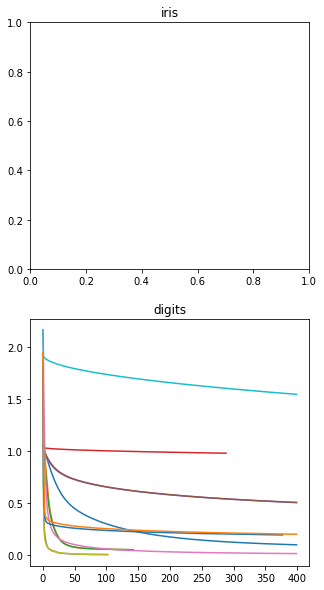

In [17]:
#这个是绘制图像
fig,axes = plt.subplots(2,1,figsize =(5,10))
iris = datasets.load_iris()
x_digits,y_digits =datasets.load_digits(return_X_y=True)
data_set = [
    (iris.data,iris.target),
    (x_digits,y_digits)
]

for ax,data,name in zip(axes,data_set,['iris','digits']):
    plot_on_dataset(data[0],data[1],ax,name)